# BGC-Argo Quality Control

This is a jupyter notebook to demonstrate the fucntionality of the `bgcArgo` python module, which is based on the SOCCOM set of matlab code for performing the same task. In order to perform these tasks, WOA, NCEP, and Argo data must be available. These must be downloaded to your local machine (which can be done using `bgcArgo`, shown below). Plan to add functionality to get the necessary data remotely. 

In [1]:
%matplotlib inline
from ipywidgets import interactive, fixed

from pathlib import Path
from bgcArgo import sprof

Set up appropriate local directories:

In [2]:
datadir   = Path('/Users/gordonc/Documents/data')
woa_path  = datadir / 'WOA18'
ncep_path = datadir / 'NCEP'
argo_path = datadir / 'Argo/meds'

You can tell `bgcArgo` where your local directories are set up, or specify the path to each function:

In [3]:
sprof.set_dirs(woa_path=woa_path, ncep_path=ncep_path, argo_path=argo_path)

If the data is not already saved to your local machine, you can use the module to download the reference data as well as Argo data:
```python
import bgcArgo

# get the reference data
bgcArgo.io.get_woa18('O2sat', local_path=woa_path)
bgcArgo.io.get_ncep('pres', local_path=ncep_path)

# get argo data for float 4902481, could provide more float numbers
dacdir = '/ifremer/argo/dac/meds'
wmo_numbers = [4902481]
bgcArgo.io.get_argo(dac_path, wmo_numbers, local_path=argo_path)
```
With reference data downloaded, float data is easily loaded into an object that will have fields for each float variable:

In [4]:
flt = sprof(4902481)

This creates a `class argo` which has various methods attached to it for visualization and QC. Example of plotting profiles:

In [5]:
w = interactive(flt.plot, kind=fixed('profiles'), 
                varlist=[('T and O2',['TEMP', 'DOXY']),
                         ('Physics',['TEMP', 'PSAL', 'PDEN'])],
                Ncycle=(1, flt.N_CYCLES), Nprof=(1, flt.N_CYCLES), zvar=['PRES', 'PDEN'])
display(w)

interactive(children=(Dropdown(description='varlist', options=(('T and O2', ['TEMP', 'DOXY']), ('Physics', ['T…

time section: 

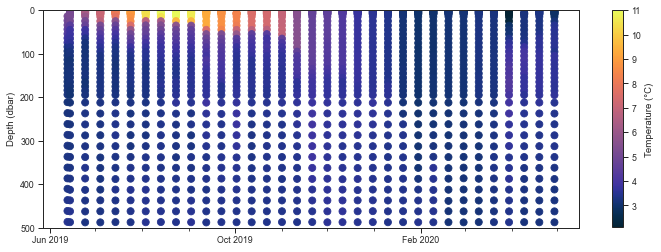

In [6]:
w = interactive(flt.plot, kind=fixed('cscatter'), varname=['TEMP','PSAL','DOXY'], ylim=fixed((0,500)))
display(w)

Can calculate oxygen gain using WOA or NCEP data as reference values:

In [7]:
woa_gains  = flt.calc_gains(ref='WOA')
ncep_gains = flt.calc_gains(ref='NCEP')

print('WOA Gains:', woa_gains, '\n')
print('NCEP Gains: ', ncep_gains)

ValueError: operands could not be broadcast together with shapes (34,) (33,) 

Results can be plotted:

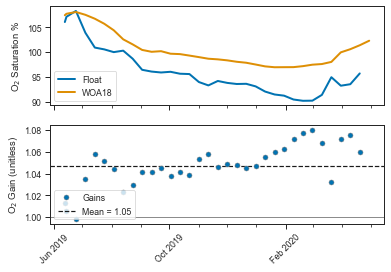

In [8]:
w = interactive(flt.plot, kind=fixed('gain'), ref=['WOA', 'NCEP'])
display(w)

The `argo` object allows for easy plotting and data access, but if you just want to load the data from the float for your own use, that can easily be done as well:

In [9]:
# get a python dictionary
float_dict = flt.to_dict()
# create a pandas dataframe
float_df = flt.to_dataframe()
print(float_df.head())

CYCLE            SDN   LATITUDE  LONGITUDE       PRES   TEMP       PSAL  \
0      1  737222.538194  56.531078 -52.702686  14.100000  5.162  34.610001   
1      1  737222.538194  56.531078 -52.702686  24.200001  4.964  34.618999   
2      1  737222.538194  56.531078 -52.702686  34.400002  4.827  34.625000   
3      1  737222.538194  56.531078 -52.702686  44.299999  4.445  34.643002   
4      1  737222.538194  56.531078 -52.702686  54.500000  4.190  34.659000   

        PDEN        DOXY  
0  27.347168  328.017212  
1  27.377563  327.952667  
2  27.398193  327.086517  
3  27.455078  325.447540  
4  27.495239  322.789764  


Next steps:
* More validation against SOCCOM matlab code
* Validation against already DMQC'ed Argo floats
* Right now works with Argo synthetic profiles (and BRtraj for in-air data) - will probably want to build individual profile functionality as well
* Optode response time correction
* Access data remotely - both reference and Argo data sets
* Have it work well with BODC version of OWC code?